In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 10]

In [2]:
def get_data(folder):
    data = {}
    for filename in os.listdir(folder):
        if filename.endswith(".csv") and ('progress-' in filename):
            df = pd.read_csv(folder + "/" + filename)
            data[os.path.splitext(filename)[0]] = df
            continue
        else:
            continue
    return data

In [3]:
DATA_DIR = '3rd-party/recurrent-neural-net/data/4x128'
dt = get_data(DATA_DIR)

In [34]:
m = min([len(dt['progress-tanf-500k-m1pro']), len(dt['progress-tanh-500k-m1pro'])])
tf1 = dt['progress-tanf-500k-m1pro'].truncate(after=(m-1))
th1 = dt['progress-tanh-500k-m1pro'].truncate(after=(m-1))
print_time(tf1, th1)

Total Time savings: 491.244 seconds


In [5]:
def plot_relative_time(tanf, tanh, title):
    plt.rcParams['figure.figsize'] = [12, 10]
    fw = (tanh['FWtime'] - tanf['FWtime'])/tanh['FWtime']
    bw = (tanh['BWtime'] - tanf['BWtime'])/tanh['BWtime']
    plt.title(title)
    plt.ylabel("Time saving, %")
    plt.xlabel("Iterations, in 1000's")
    plt.plot(fw[4:]*100, label = "Forward")
    plt.plot(bw[4:]*100, label = "Backward")
    plt.legend()
    plt.show()
    
def plot_time_diff(tanf, tanh, title):
    plt.rcParams['figure.figsize'] = [12, 10]
    fw = (tanh['FWtime'] - tanf['FWtime'])
    bw = (tanh['BWtime'] - tanf['BWtime'])
    plt.title(title)
    plt.ylabel("Time saving, ms")
    plt.xlabel("Iterations, in 1000's")
    plt.plot(fw[4:]*100, label = "Forward")
    plt.plot(bw[4:]*100, label = "Backward")
    plt.legend()
    plt.show()

    
def plot_loss(tanf, tanh, title):
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Iterations, in 1000's")
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.plot(tanh['Loss'][4:], label = "Tanh")
    plt.plot(tanf['Loss'][4:], label = "Tanf")
    plt.legend()
    plt.show()
    
def print_time(tanf, tanh):
    t = tanh['FWtime'][-1:] - tanf['FWtime'][-1:]+ tanh['BWtime'][-1:] - tanf['BWtime'][-1:]
    print("Total Time savings: %.3f seconds" % t)

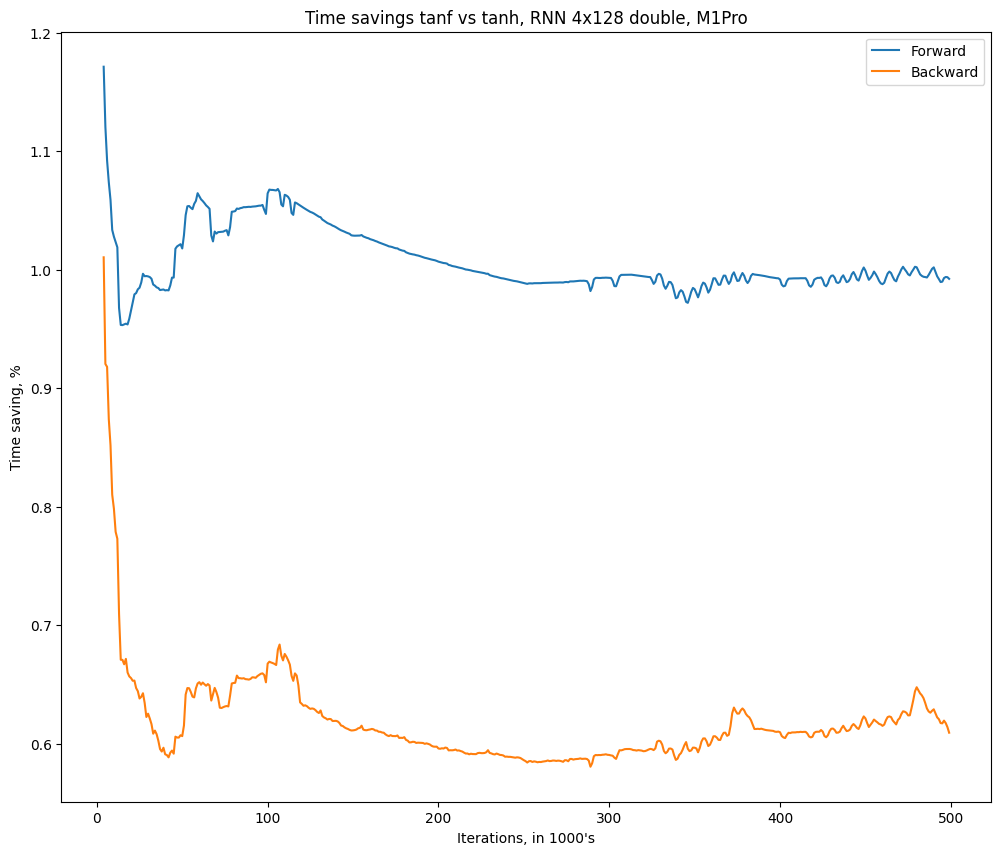

In [6]:
plot_relative_time(tf1, th1, "Time savings tanf vs tanh, RNN 4x128 double, M1Pro")

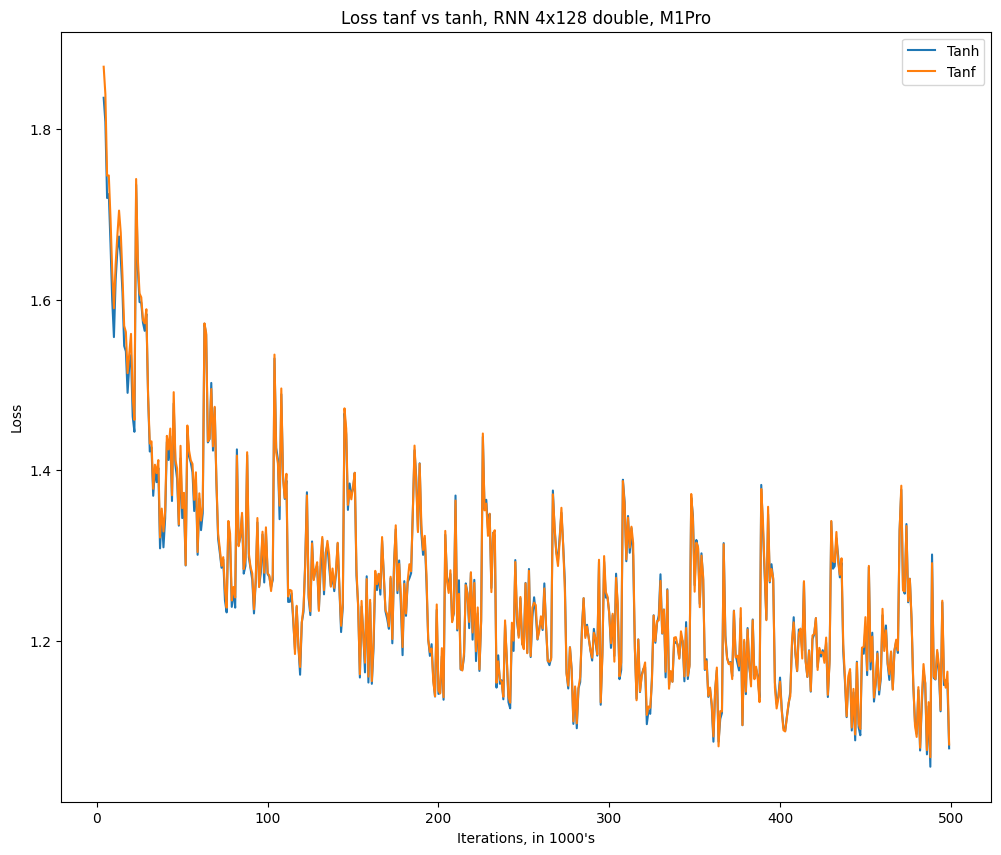

In [7]:
plot_loss(tf1, th1, "Loss tanf vs tanh, RNN 4x128 double, M1Pro")

In [8]:
print_time(tf1, th1)

Total Time savings: 491.244 seconds


In [33]:
m2 = min([len(dt['progress-tanf-320k-i9-wsl']), len(dt['progress-tanh-320k-i9-wsl'])])
tf2 = dt['progress-tanf-320k-i9-wsl'].truncate(after=(m2-1))
th2 = dt['progress-tanh-320k-i9-wsl'].truncate(after=(m2-1))
print_time(tf2, th2)

Total Time savings: 1701.927 seconds


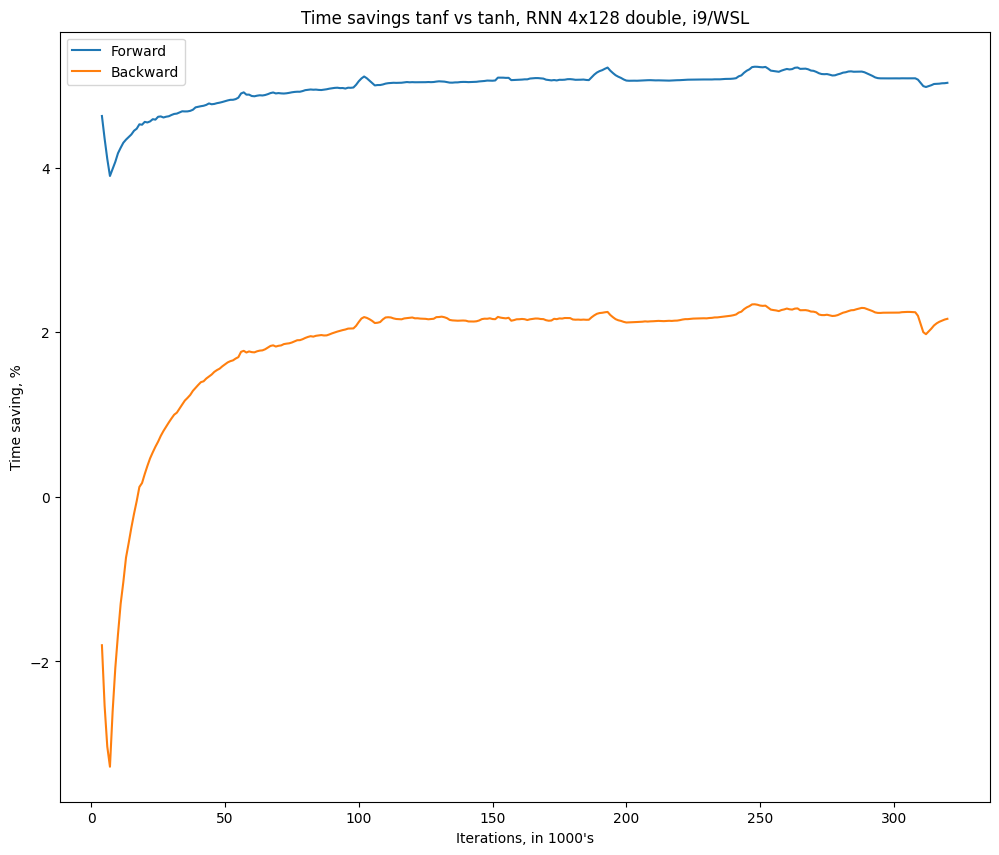

In [10]:
plot_relative_time(tf2, th2, "Time savings tanf vs tanh, RNN 4x128 double, i9/WSL")

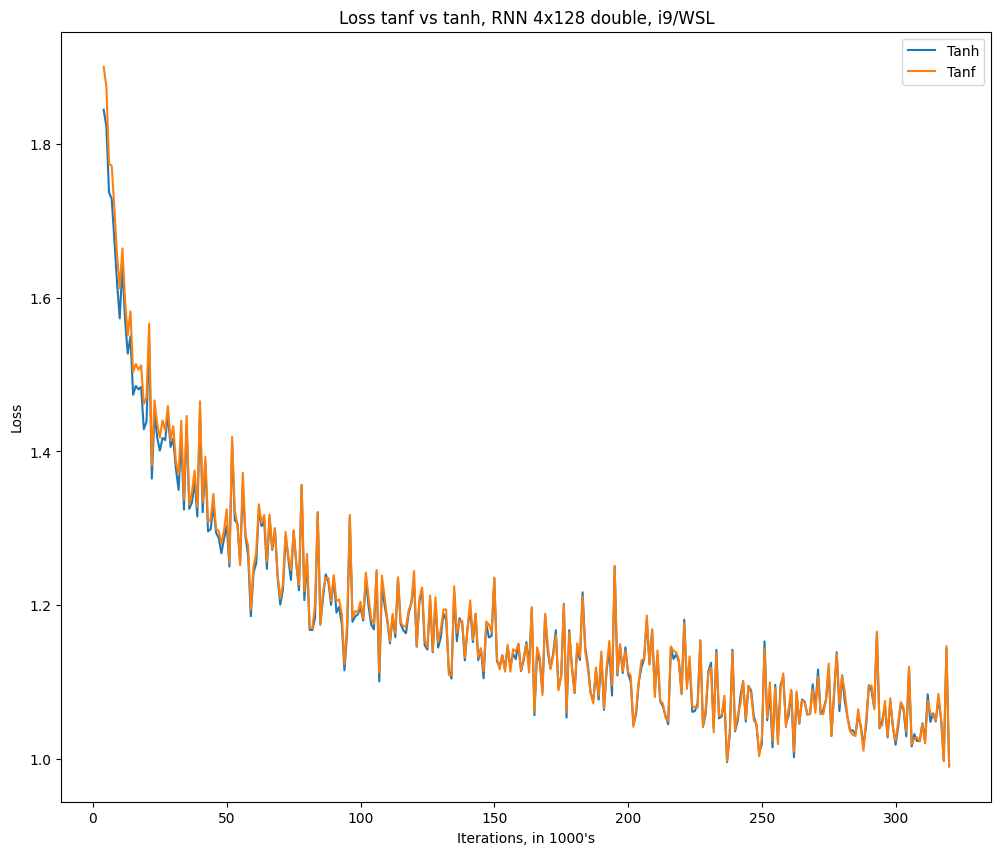

In [11]:
plot_loss(tf2, th2, "Loss tanf vs tanh, RNN 4x128 double, i9/WSL")

In [31]:
m3 = min([len(dt['progress-tanf-200k-M1Pro-float']), len(dt['progress-tanh-200k-M1Pro-float'])])
tf3 = dt['progress-tanf-200k-M1Pro-float'].truncate(after=(m3-1))
th3 = dt['progress-tanh-200k-M1Pro-float'].truncate(after=(m3-1))
print_time(tf3, th3)

Total Time savings: 161.948 seconds


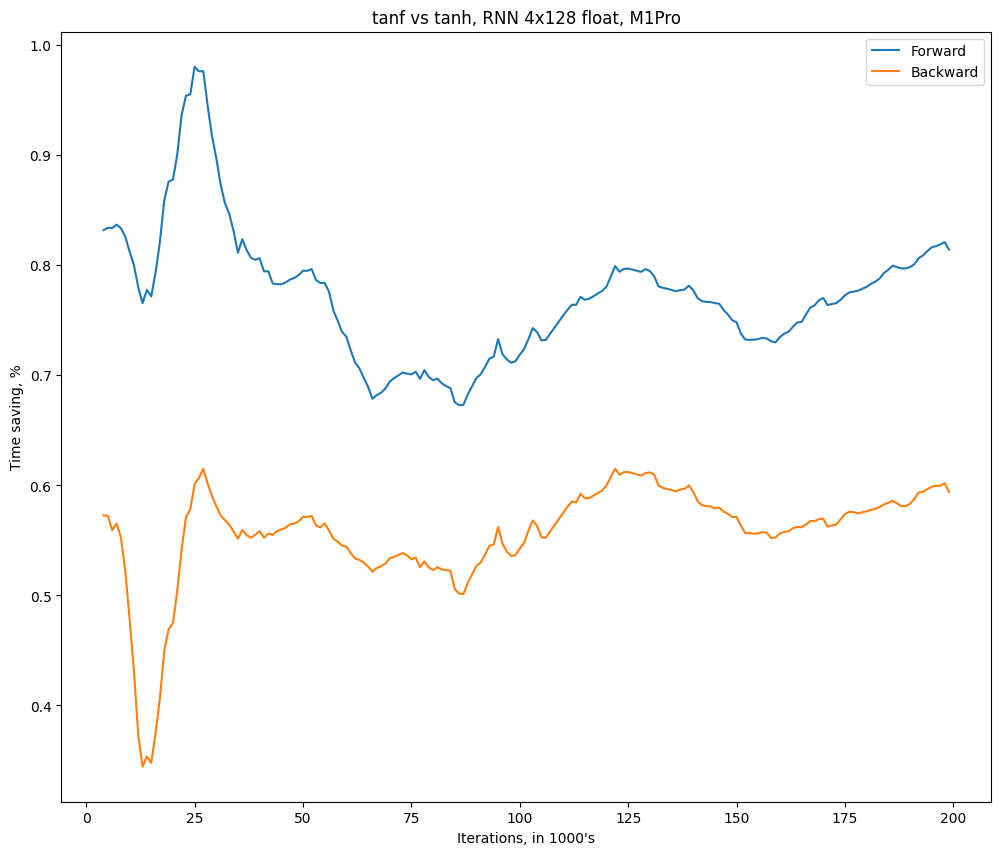

In [13]:
plot_relative_time(tf3, th3, "tanf vs tanh, RNN 4x128 float, M1Pro")

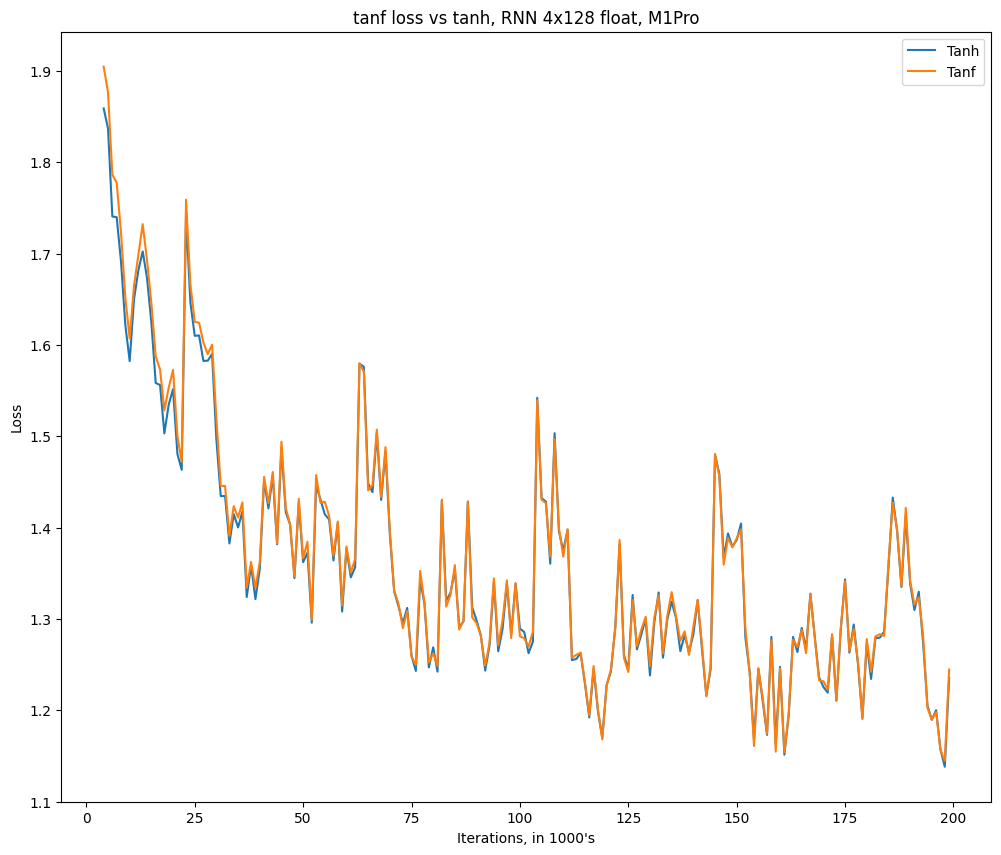

In [14]:
plot_loss(tf3, th3, "tanf loss vs tanh, RNN 4x128 float, M1Pro")

In [32]:
m4 = min([len(dt['progress-tanf-100k-xeon-float']), len(dt['progress-tanh-100k-xeon-float'])])
tf4 = dt['progress-tanf-100k-xeon-float'].truncate(after=(m4-1))
th4 = dt['progress-tanh-100k-xeon-float'].truncate(after=(m4-1))
print_time(tf4, th4)

Total Time savings: -18.382 seconds


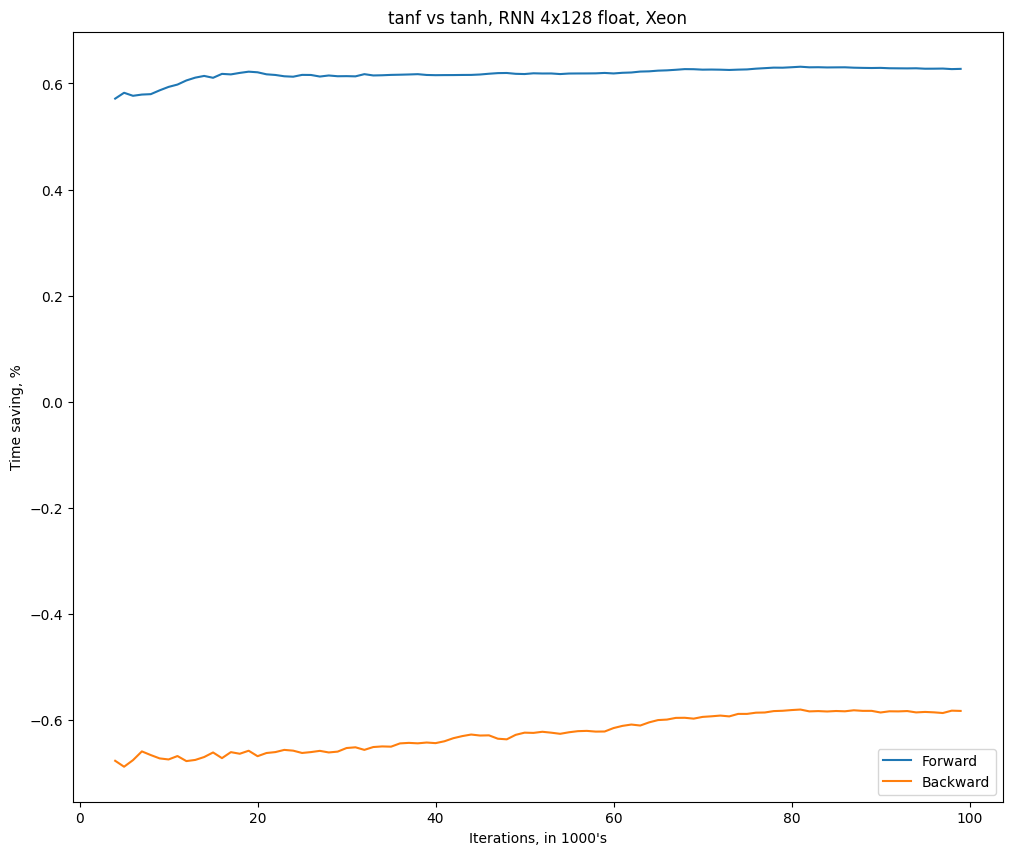

In [17]:
plot_relative_time(tf4, th4, "tanf vs tanh, RNN 4x128 float, Xeon")

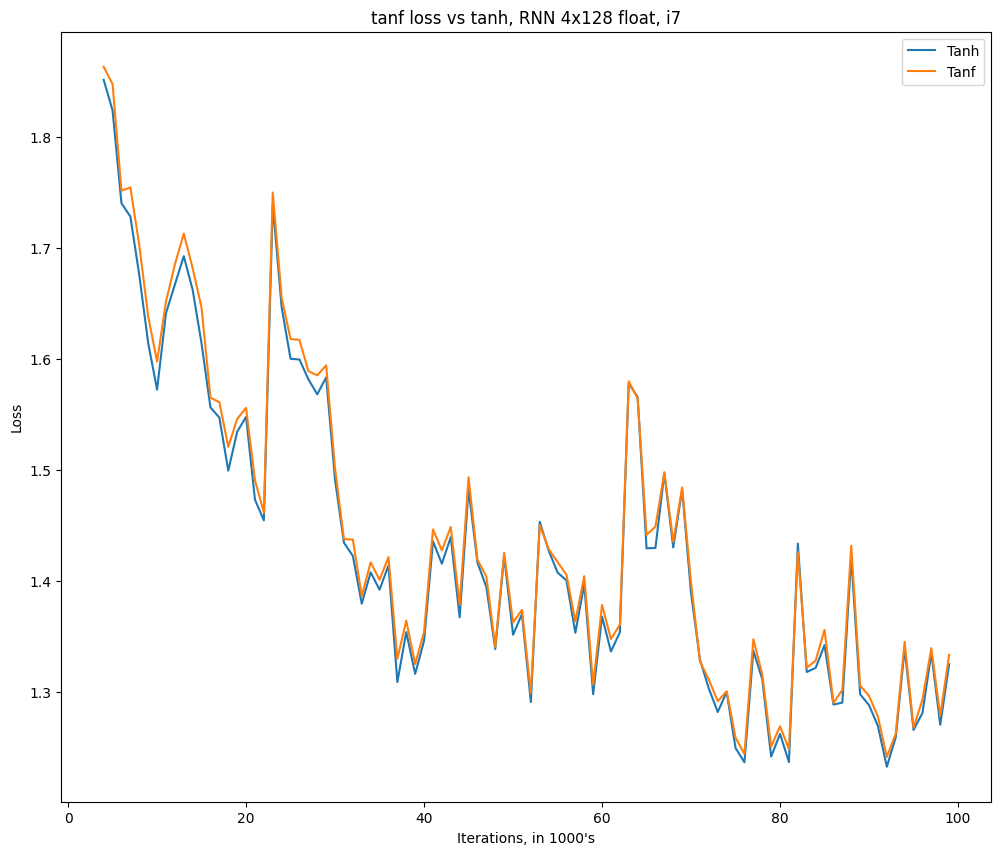

In [18]:
plot_loss(tf4, th4, "tanf loss vs tanh, RNN 4x128 float, i7")

In [20]:
m5 = min([len(dt['progress-tanf-200k-i9-float']), len(dt['progress-tanh-200k-i9-float'])])
tf5 = dt['progress-tanf-200k-i9-float'].truncate(after=(m5-1))
th5 = dt['progress-tanh-200k-i9-float'].truncate(after=(m5-1))
print_time(tf5, th5)

Total Time savings: 73.679 seconds


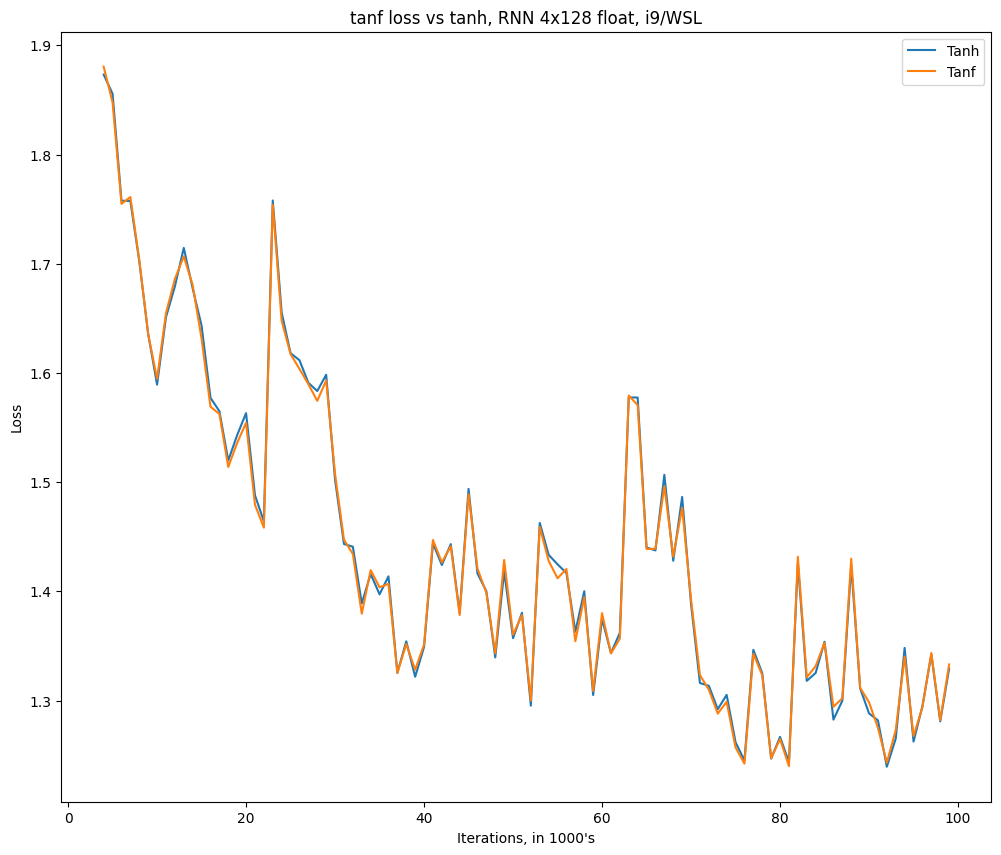

In [21]:
plot_loss(tf5, th5, "tanf loss vs tanh, RNN 4x128 float, i9/WSL")

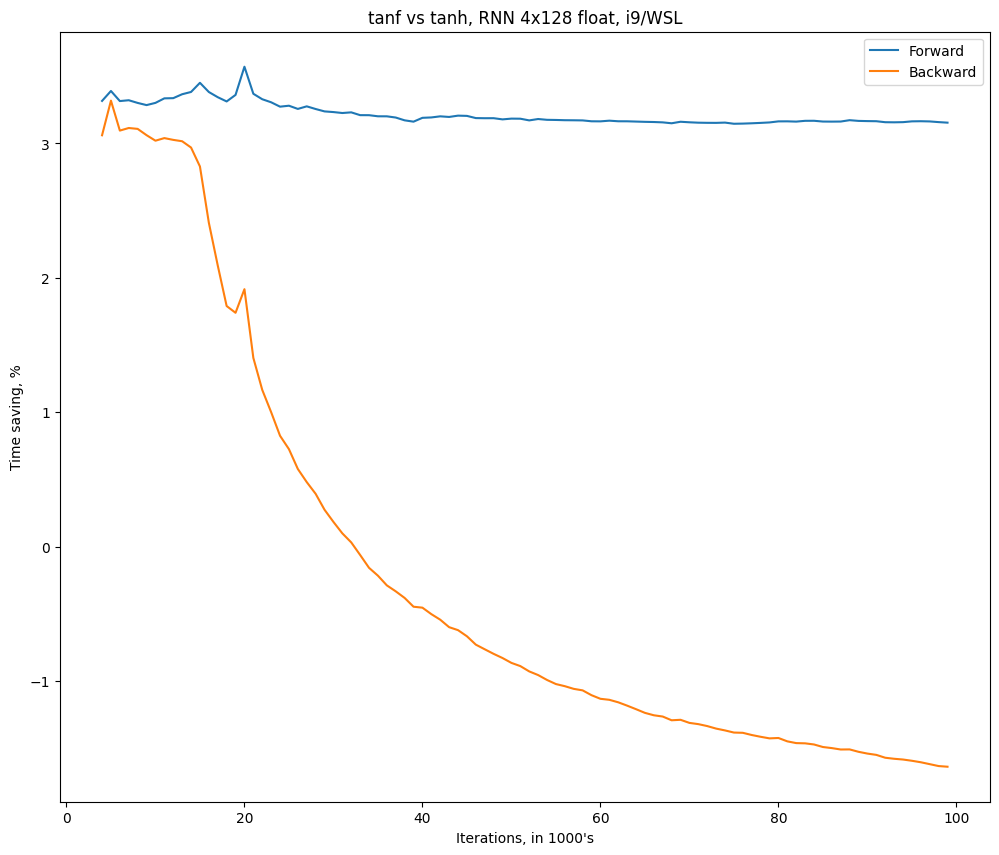

In [28]:
plot_relative_time(tf5, th5, "tanf vs tanh, RNN 4x128 float, i9/WSL")

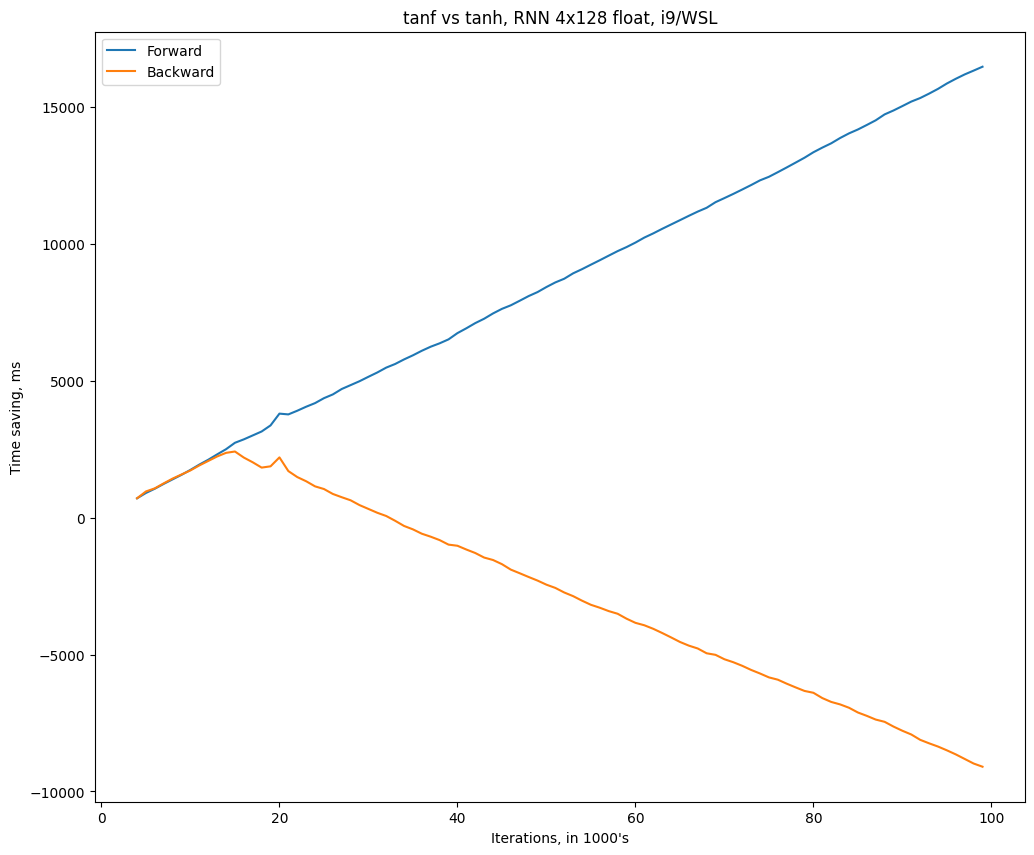

In [35]:
plot_time_diff(tf5, th5, "tanf vs tanh, RNN 4x128 float, i9/WSL")

In [30]:
m6 = min([len(dt['progress-tanf-200k-i7-float']), len(dt['progress-tanh-200k-i7-float'])])
tf6 = dt['progress-tanf-200k-i7-float'].truncate(after=(m6-1))
th6 = dt['progress-tanh-200k-i7-float'].truncate(after=(m6-1))
print_time(tf6, th6)

Total Time savings: 334.914 seconds


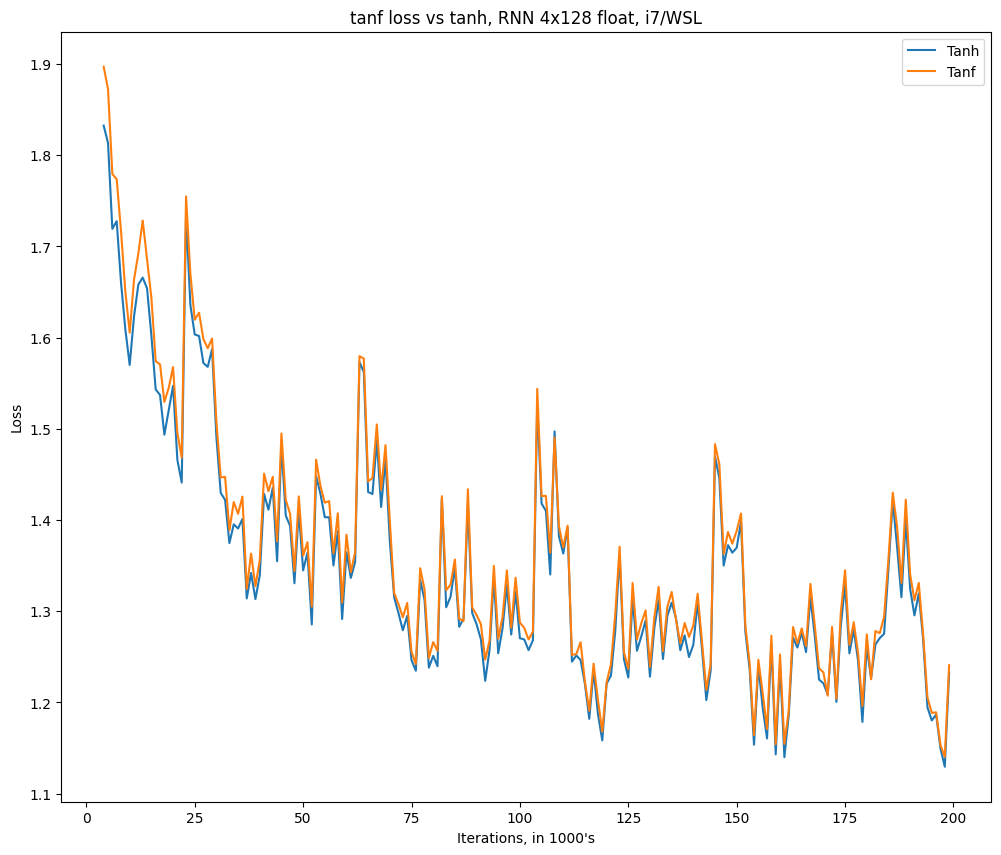

In [24]:
plot_loss(tf6, th6, "tanf loss vs tanh, RNN 4x128 float, i7/WSL")

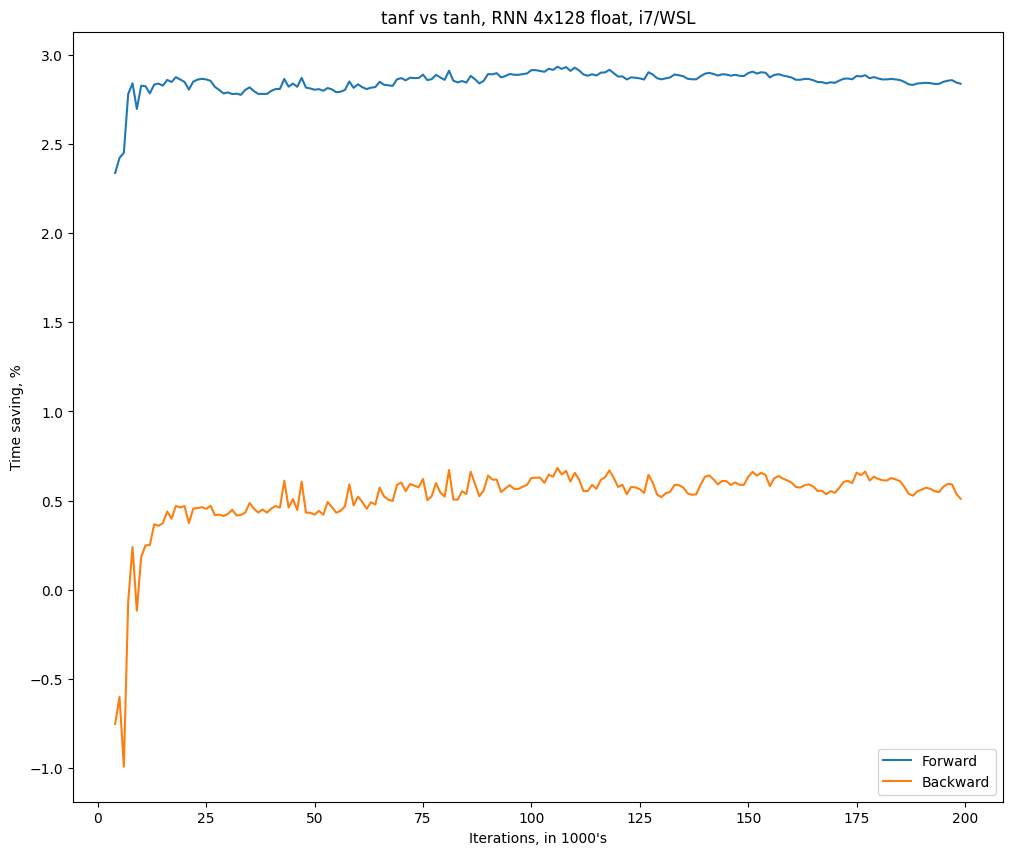

In [29]:
plot_relative_time(tf6, th6, "tanf vs tanh, RNN 4x128 float, i7/WSL")